In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\amans\\Music\\Machine Learning Udemy\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<Axes: xlabel='class', ylabel='count'>

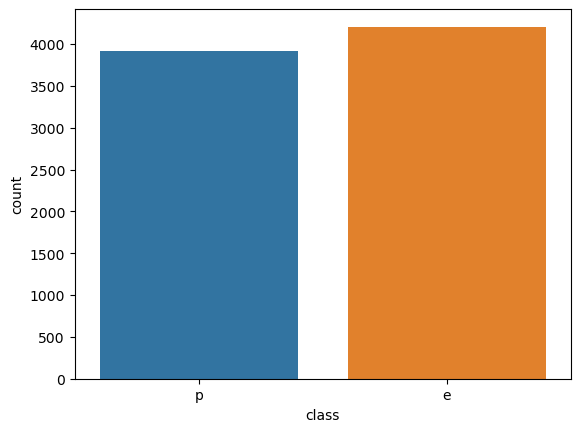

In [4]:
sns.countplot(data= df , x= 'class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
feat_uniq = df.describe().T.reset_index().sort_values('unique')

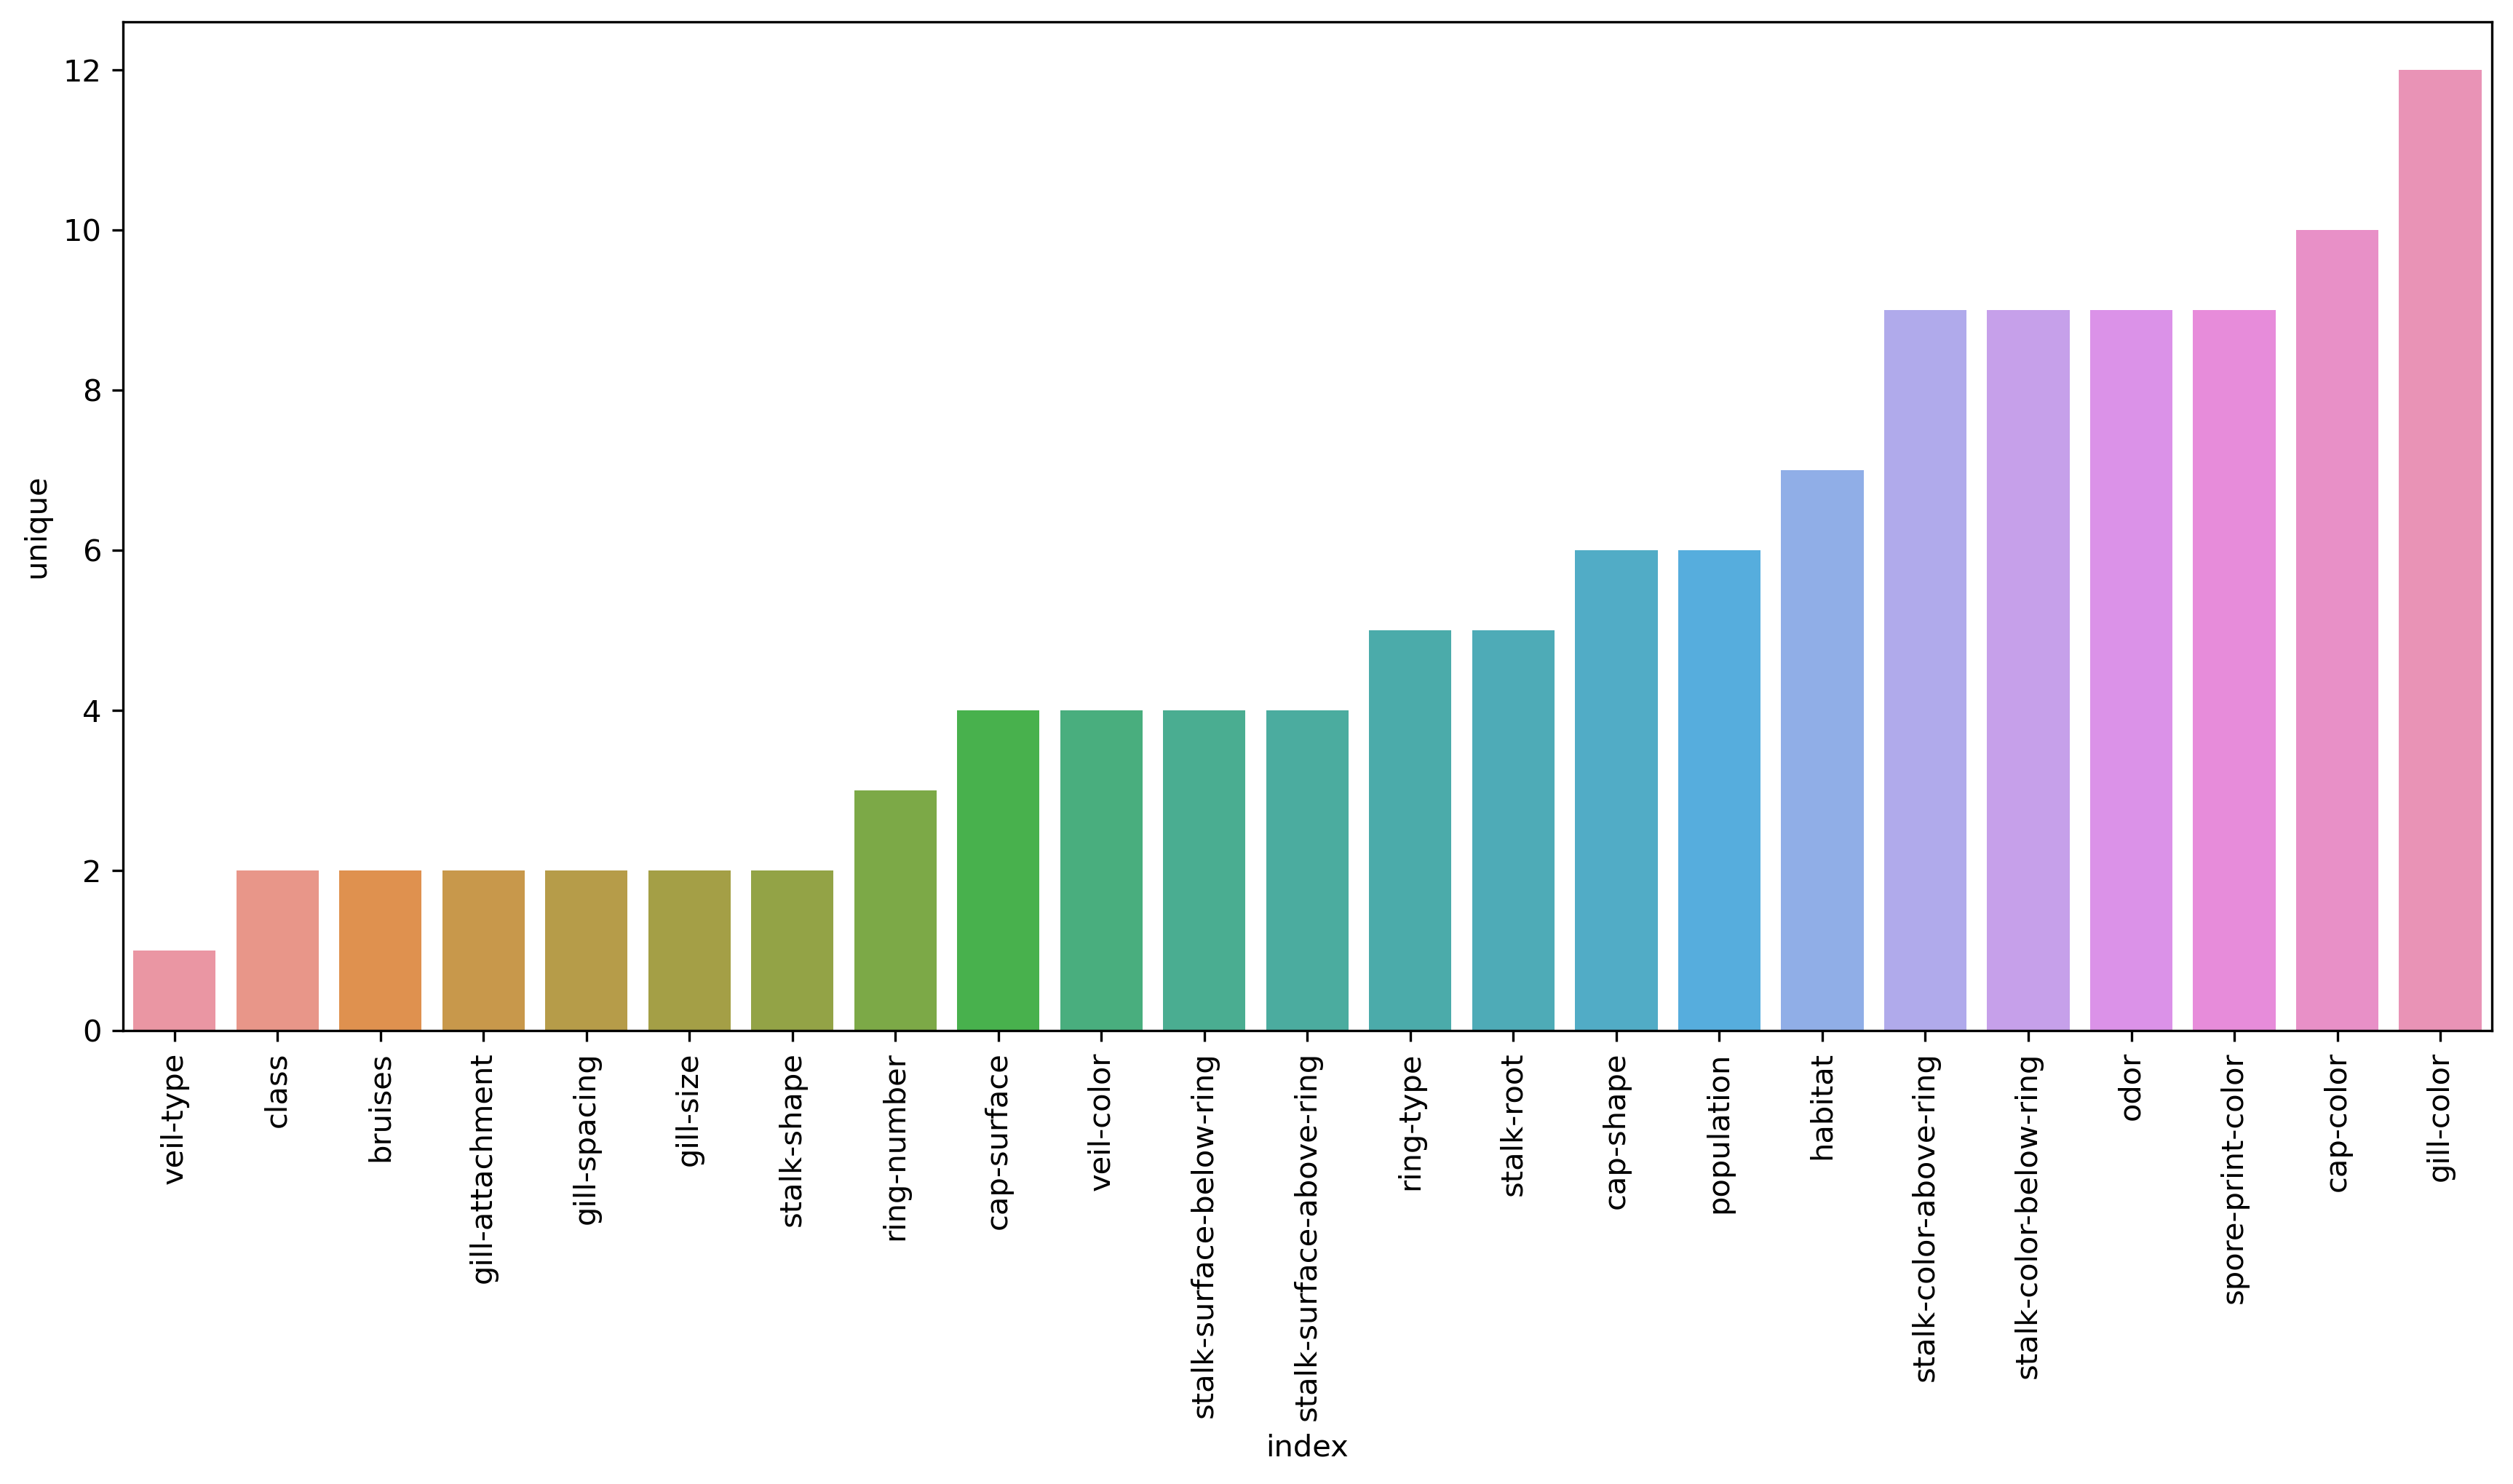

In [7]:
plt.figure(figsize=(14,6),dpi= 300)
sns.barplot(data=feat_uniq,x='index',y='unique')
plt.xticks(rotation = 90 );

In [8]:
X = df.drop('class',axis=1)

In [9]:
#X.isnull().sum()

In [10]:
X = pd.get_dummies(X,drop_first= True)

In [11]:
y= df['class']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Adaboosting

In [14]:
from sklearn.ensemble import AdaBoostClassifier

In [15]:
model= AdaBoostClassifier(n_estimators= 1)

In [16]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [17]:
from sklearn.metrics import classification_report,accuracy_score

In [18]:
predictions=  model.predict(X_test)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [20]:
model.feature_importances_.argmax()

22

In [21]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

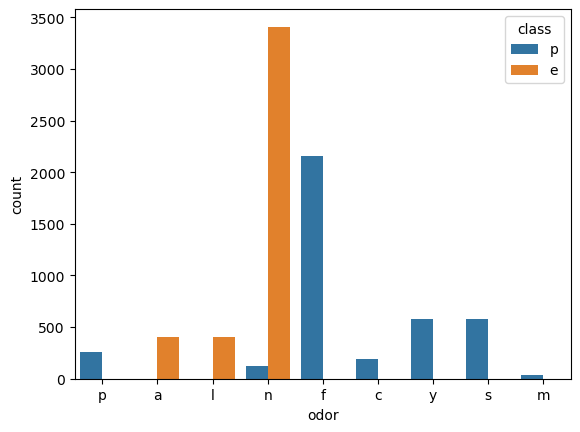

In [22]:
sns.countplot(data=df,x='odor',hue='class');

In [23]:
erro_rate = []

for n in range(1,len(X.columns)+1):
    model = AdaBoostClassifier(n_estimators= n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    err = 1- accuracy_score(y_test,preds)
    
    erro_rate.append(err)
    

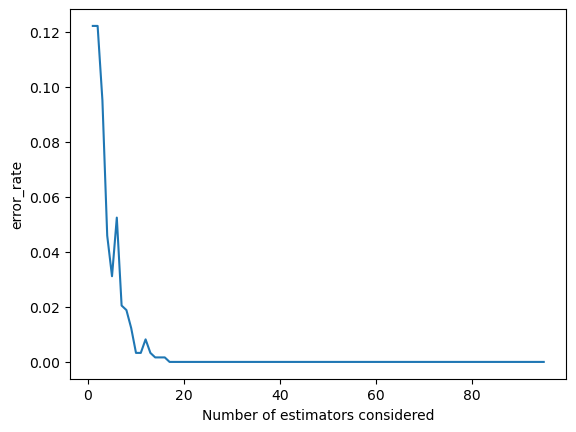

In [24]:
plt.plot(range(1,len(X.columns)+1),erro_rate)
plt.xlabel('Number of estimators considered')
plt.ylabel('error_rate');

In [25]:
feats = pd.DataFrame(index= X.columns, data= model.feature_importances_ , columns=['Importance'])

In [26]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [27]:
imp_feats = feats[feats['Importance']>0]

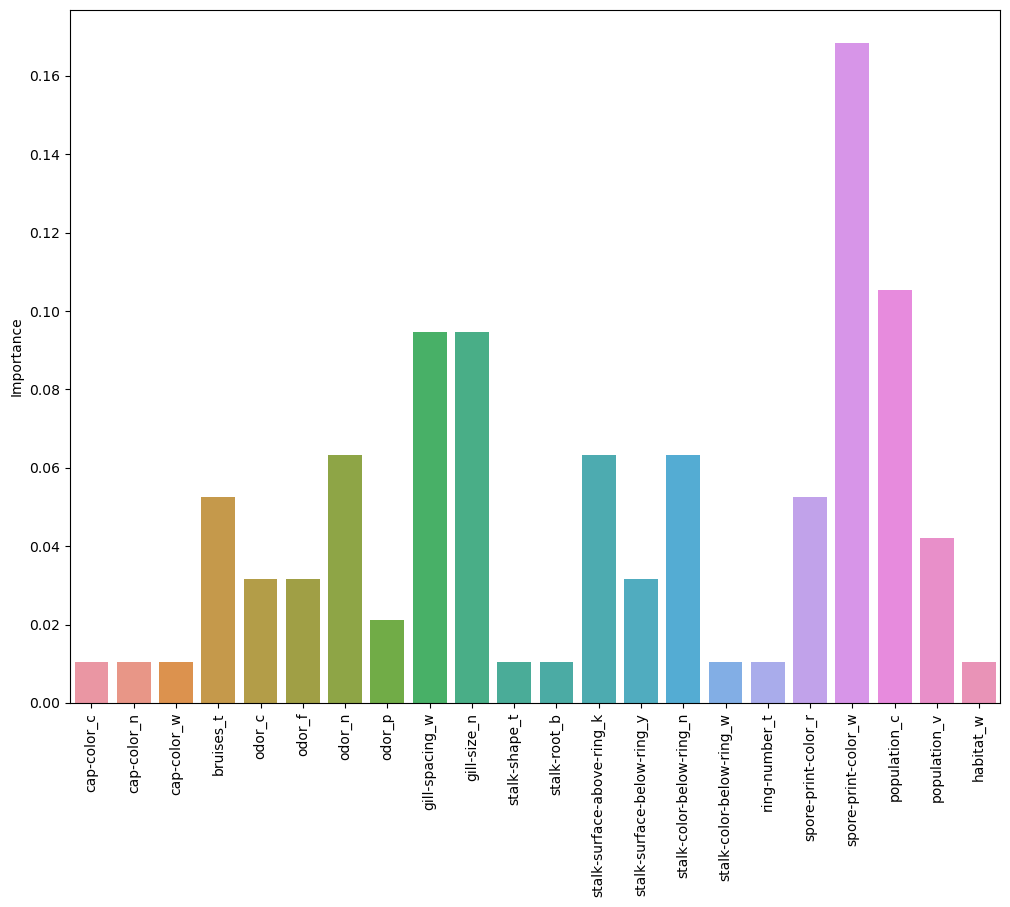

In [28]:
plt.figure(figsize=(12,9))
sns.barplot(data = imp_feats, x= imp_feats.index,y= 'Importance')
plt.xticks(rotation=90);

# Gradient Boosting 

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [32]:
gb_model = GradientBoostingClassifier()

In [33]:
grid =  GridSearchCV(gb_model,param_grid)

In [34]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [36]:
predictions =  grid.predict(X_test)

In [37]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [40]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.03804777e-17, 1.65172273e-17, 0.00000000e+00,
       8.39368743e-17, 1.05030313e-03, 1.18312069e-05, 2.74003767e-17,
       0.00000000e+00, 6.20010581e-18, 0.00000000e+00, 0.00000000e+00,
       2.27813012e-17, 0.00000000e+00, 0.00000000e+00, 2.22085607e-08,
       2.31055039e-03, 5.29281709e-02, 1.84253604e-04, 1.03201590e-02,
       1.82499853e-02, 3.59599703e-04, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.03950811e-02, 0.00000000e+00, 1.02386296e-16, 0.00000000e+00,
       2.35045788e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.11045550e-17, 0.00000000e+00, 6.08388083e-17, 0.00000000e+00,
       6.43330480e-04, 1.44048311e-03, 1.36012268e-01, 7.71855052e-03,
       2.86690056e-02, 6.21308869e-04, 6.12113083e-06, 4.95063766e-06,
       1.76797782e-05, 1.35380870e-07, 3.75588041e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.50350499e-04, 0.00000000e+00,
      

In [41]:
feat_import = grid.best_estimator_.feature_importances_

In [42]:
imp_feat = pd.DataFrame(index= X.columns, data= feat_import, columns=['Importance'])

In [45]:
imp_feat=imp_feat[imp_feat['Importance']>0.0005]

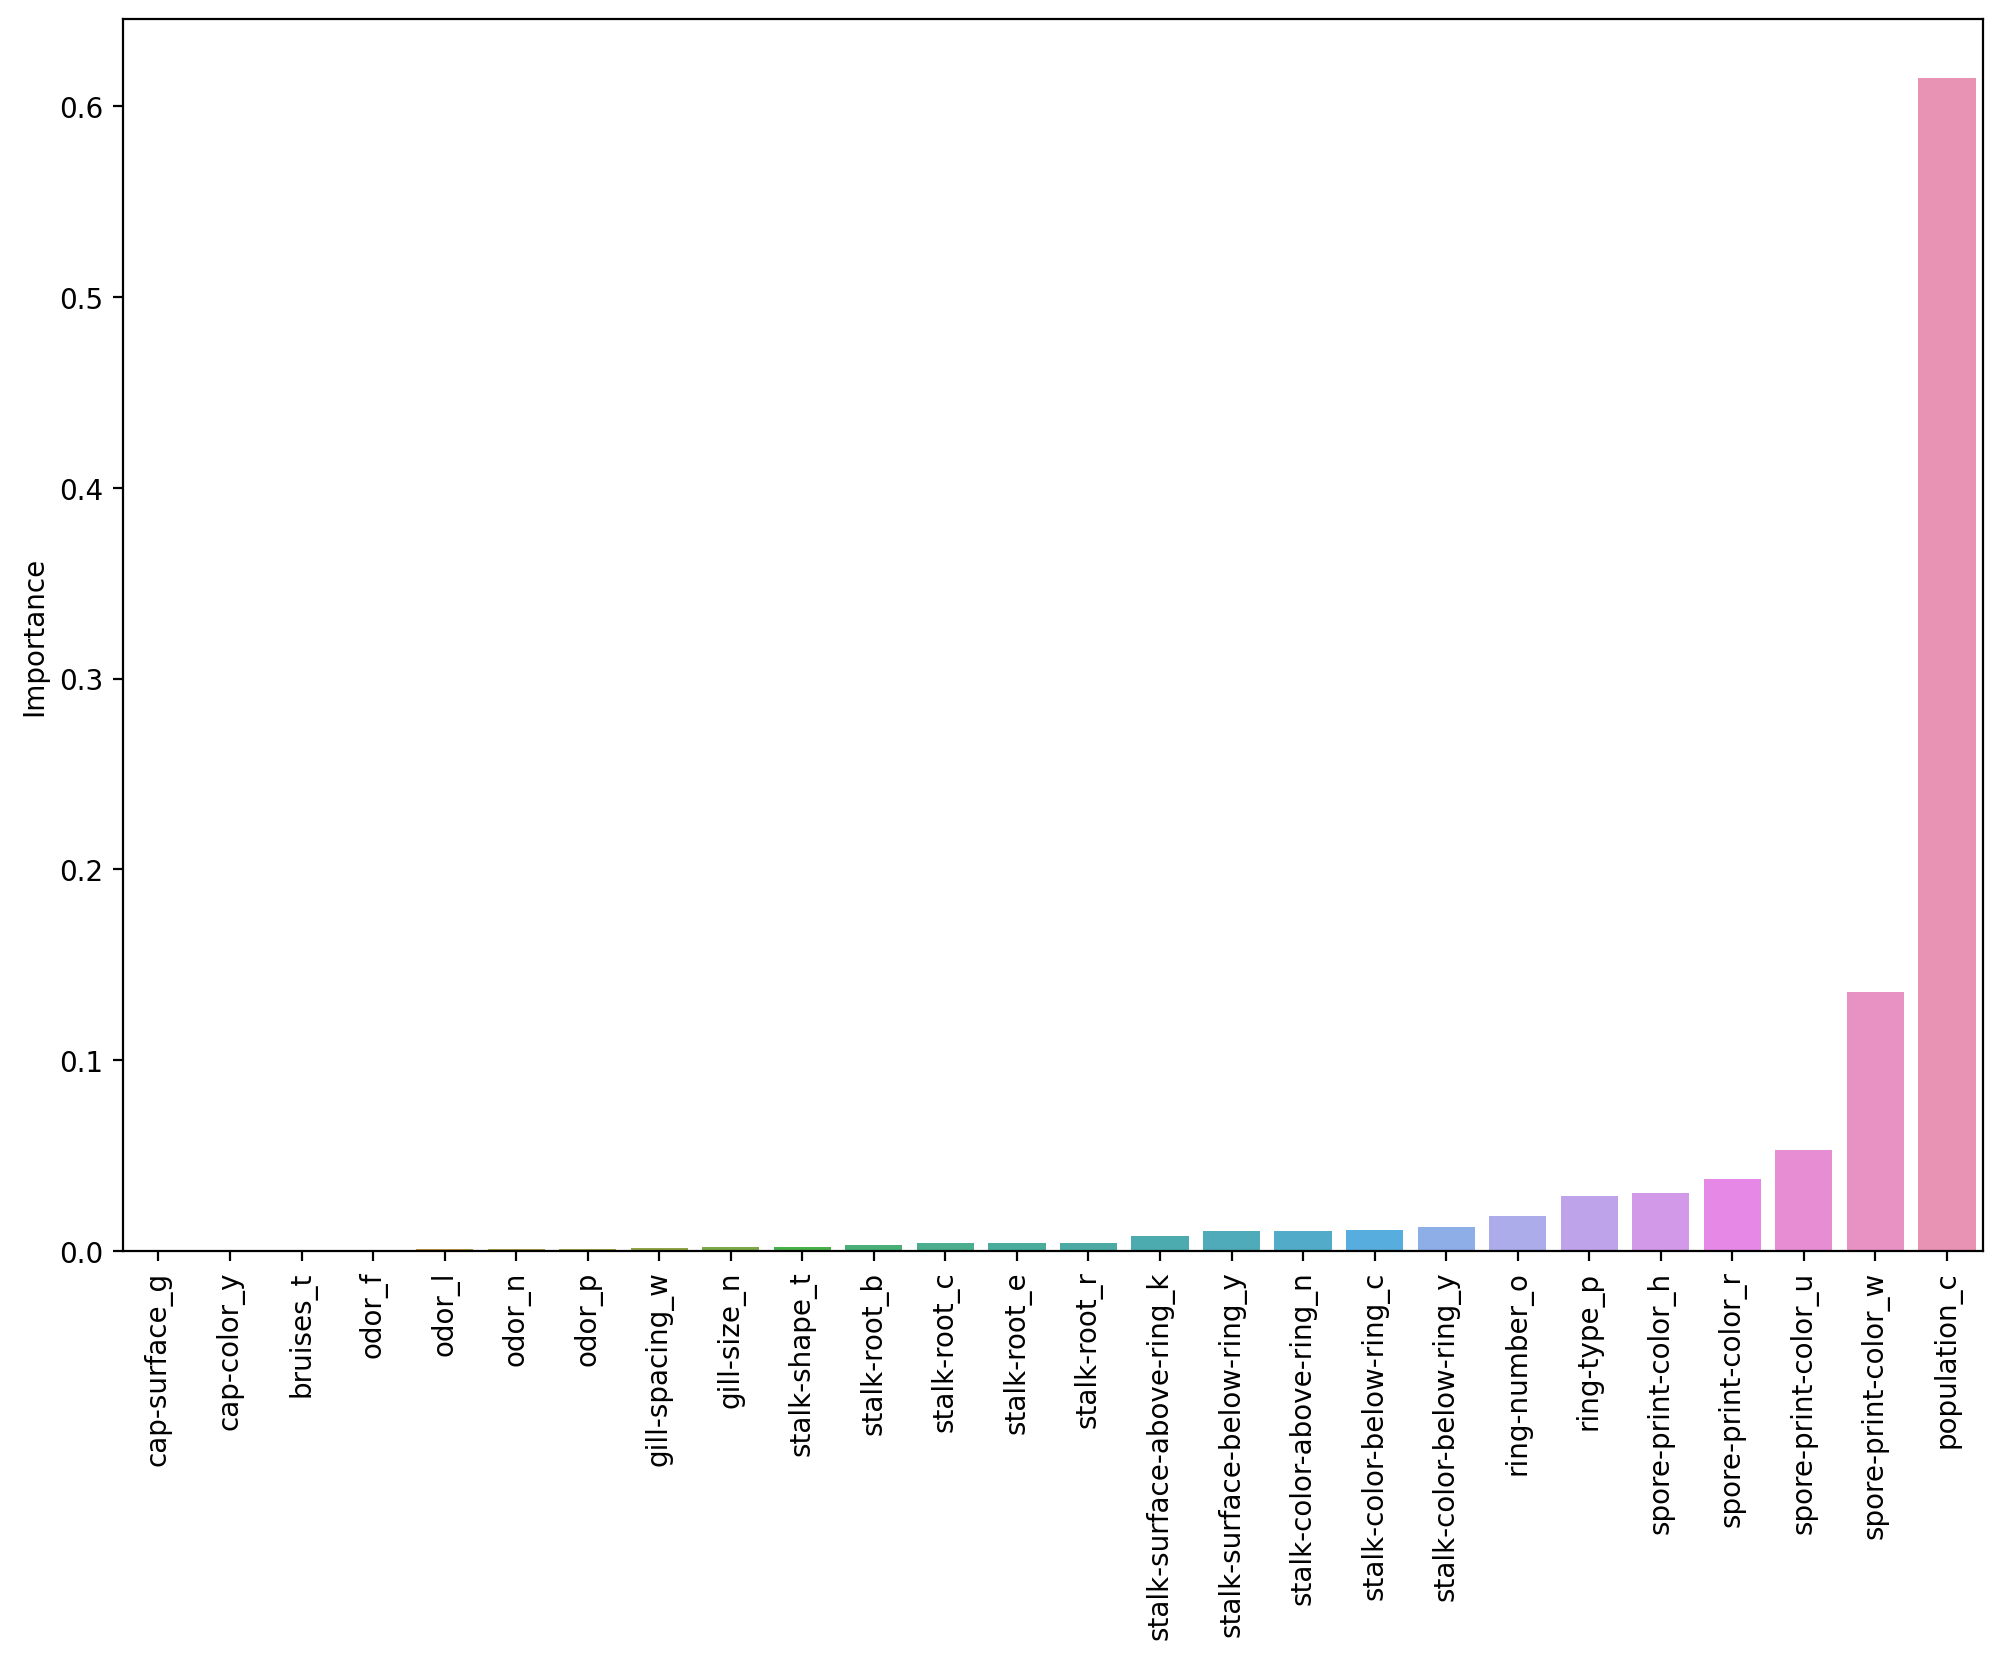

In [52]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat.sort_values("Importance"), 
            x= imp_feat.index,
            y='Importance');
plt.xticks(rotation = 90 );